In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, color, img_as_float
# img_as_float переводит имзображение в численное представление
# https://chat.openai.com/share/79755115-6b91-416e-ab70-b069c432674a


from IPython.display import display, Image
# для показывания изображения
# пример использования display(Image('gray_mandrill.png')) 
# нам особо это не нужно, используем imshow
import cv2

In [13]:
# Function to normalize an image
# в результате работы функции все значения ячейки матрицы распологаются от 0 до 1
# функция работает изображением, которое оно тоже воспринимает как матрицу
# функция делает нормализованные монохромные изображения (то есть двумерные массивы) 
# если мы делаем нормализованные трехмерные массивы для цветных изображений, то каждый слой надо нормализовать отдельно
# https://chat.openai.com/share/276a3f57-28a9-45b8-902a-8ddcc7053f4e 

def normalize_image(im):   
    im_res = im - np.min(im)
    return (1 / np.max(im_res)) * im_res

def norm_columns(x):
    columns_sums = np.sum(x, axis=0)
    columns_sums[columns_sums == 0] = np.finfo(float).eps
    # Убедимся, что нормализация применяется корректно
    return x / columns_sums[np.newaxis, :]

# поправила norm_rows, а то там появляется деление на ноль
def norm_rows(x):
    row_sums = np.sum(x, axis=1)
    # Замена нулей на очень маленькое число, чтобы избежать деления на ноль
    row_sums[row_sums == 0] = np.finfo(float).eps
    return x / row_sums[:, np.newaxis]

# See https://chat.openai.com/share/d01e5b68-f1f5-403a-9976-1203ad4cd65c 
# for further explanation
# про массивы с ChatGPT https://chat.openai.com/share/403fcfae-85d5-411a-a7f4-363ab0228dcf 

In [15]:
def monochrome(rgb_image):
    coeffs = np.array([0.299, 0.587, 0.114]) #!!! Не переводим элементы вектора в формат unit8
    return rgb_image @ coeffs

def trans_mult(A):
    result = normalize_image(np.dot(np.transpose(monochrome(A)), monochrome(A)))
    return result


In [16]:
def trans_mult_rez(A):
    result = normalize_image(np.dot(np.transpose(monochrome(img_as_float(A))), monochrome(img_as_float(A))))
    return result

# Умножаем матрицу на транспонированную

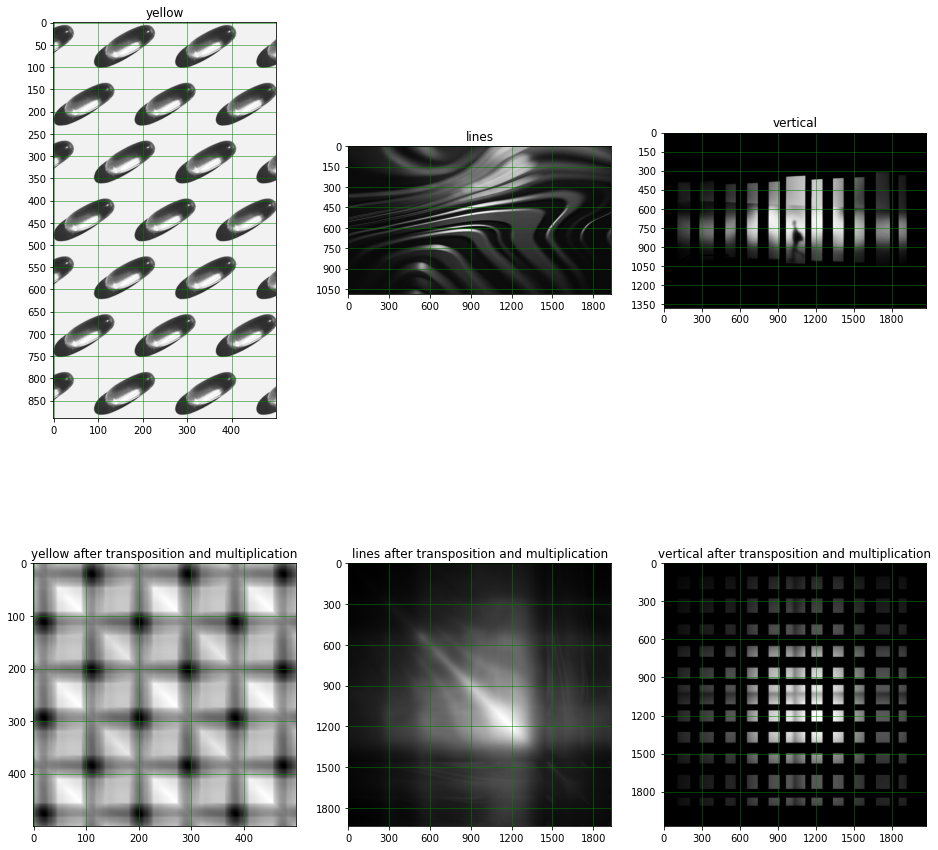

In [5]:
yellow = io.imread('https://images.unsplash.com/photo-1623066542605-bc25b4b662dd?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3'
                   '&ixid=M3wxMjA3fDB8MHx0b3BpYy1mZWVkfDI4fGlVSXNuVnRqQjBZfHxlbnwwfHx8fHw%3D')
lines = io.imread('https://images.unsplash.com/photo-1704520355609-c62b0c4010df?q=80&w=1932&auto=format'
                  '&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')
vertical = io.imread('https://images.unsplash.com/photo-1499428665502-503f6c608263?q=80&w=2070&auto=format&fit=crop&ixlib'
                         '=rb-4.0.3,&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')


fig, axes = plt.subplots(2, 3, figsize=(16, 16))

axes[0,0].imshow(monochrome(yellow), cmap='gray')
axes[0,0].set_title('yellow')
# Включение сетки
axes[0,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,0].set_xticks(range(0, yellow.shape[1], 100))  # Настройка делений сетки по оси X
axes[0,0].set_yticks(range(0, yellow.shape[0], 50))  # Настройка делений сетки по оси Y


axes[0,1].imshow(monochrome(lines), cmap='gray')
axes[0,1].set_title('lines')
# Включение сетки
axes[0,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,1].set_xticks(range(0, lines.shape[1], 300))  # Настройка делений сетки по оси X
axes[0,1].set_yticks(range(0, lines.shape[0], 150))  # Настройка делений сетки по оси Y

axes[0,2].imshow(monochrome(vertical), cmap='gray')
axes[0,2].set_title('vertical')
# Включение сетки
axes[0,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,2].set_xticks(range(0, vertical.shape[1], 300))  # Настройка делений сетки по оси X
axes[0,2].set_yticks(range(0, vertical.shape[0], 150))  # Настройка делений сетки по оси Y


axes[1,0].imshow(trans_mult(yellow), cmap='gray')
axes[1,0].set_title('yellow after transposition and multiplication')
# Включение сетки
axes[1,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1,0].set_xticks(range(0, yellow.shape[1], 100))  # Настройка делений сетки по оси X
axes[1,0].set_yticks(range(0, yellow.shape[1], 100))  # Настройка делений сетки по оси Y


axes[1,1].imshow(trans_mult(lines), cmap='gray')
axes[1,1].set_title('lines after transposition and multiplication')
# Включение сетки
axes[1,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1,1].set_xticks(range(0, lines.shape[1], 300))  # Настройка делений сетки по оси X
axes[1,1].set_yticks(range(0, lines.shape[1], 300))  # Настройка делений сетки по оси Y

axes[1,2].imshow(trans_mult(vertical), cmap='gray')
axes[1,2].set_title('vertical after transposition and multiplication')
# Включение сетки
axes[1,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1,2].set_xticks(range(0, vertical.shape[1], 300))  # Настройка делений сетки по оси X
axes[1,2].set_yticks(range(0, vertical.shape[1], 300))  # Настройка делений сетки по оси Y


# Отображение фигуры с подграфиками
plt.show()


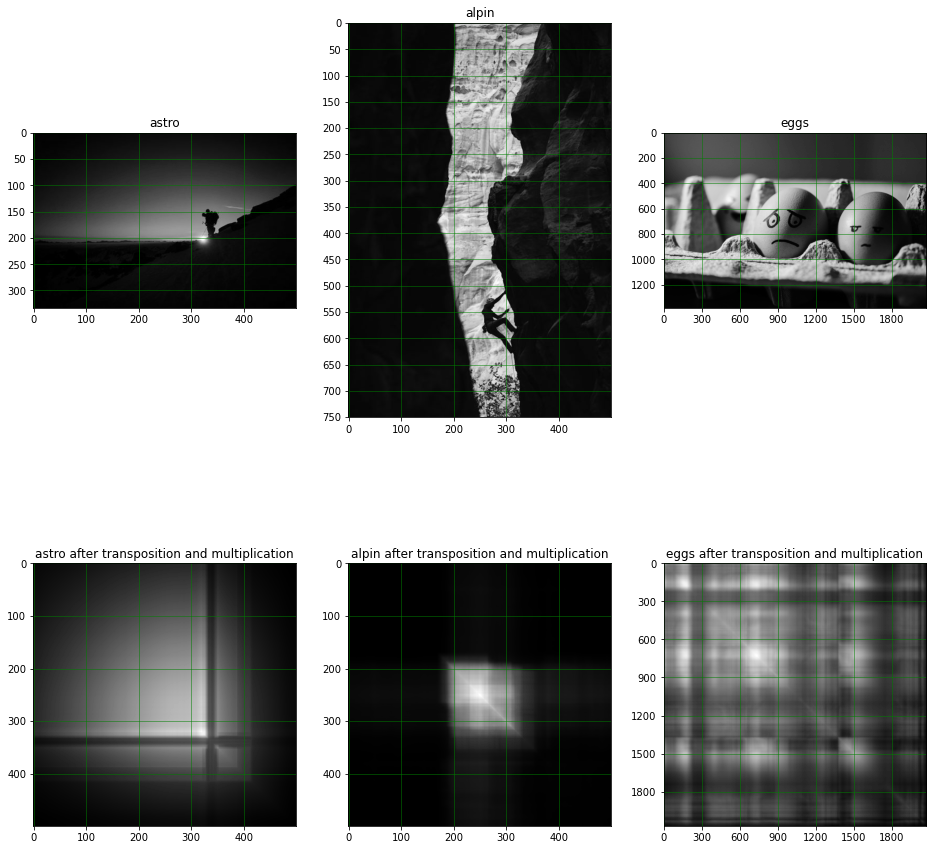

In [6]:
astro = io.imread('https://images.unsplash.com/photo-1707162798192-b32a573ca3a8?w=500&auto=format&fit=crop&q=60&ixlib='
                  'rb-4.0.3&ixid=M3wxMjA3fDB8MHxlZGl0b3JpYWwtZmVlZHwxMHx8fGVufDB8fHx8fA%3D%3D')

alpin = io.imread('https://images.unsplash.com/photo-1683009427041-d810728a7cb6?w=500&auto=format&fit=crop&q='
                 '60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDF8MHxlZGl0b3JpYWwtZmVlZHw2fHx8ZW58MHx8fHx8')
eggs = io.imread('https://images.unsplash.com/photo-1617440168937-c6497eaa8db5?q=80&w=2070&auto'
                '=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')


fig, axes = plt.subplots(2, 3, figsize=(16, 16))

axes[0,0].imshow(monochrome(astro), cmap='gray')
axes[0,0].set_title('astro')
# Включение сетки
axes[0,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,0].set_xticks(range(0, astro.shape[1], 100))  # Настройка делений сетки по оси X
axes[0,0].set_yticks(range(0, astro.shape[0], 50))  # Настройка делений сетки по оси Y


axes[0,1].imshow(monochrome(alpin), cmap='gray')
axes[0,1].set_title('alpin')
# Включение сетки
axes[0,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,1].set_xticks(range(0, alpin.shape[1], 100))  # Настройка делений сетки по оси X
axes[0,1].set_yticks(range(0, alpin.shape[0], 50))  # Настройка делений сетки по оси Y

axes[0,2].imshow(monochrome(eggs), cmap='gray')
axes[0,2].set_title('eggs')
# Включение сетки
axes[0,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,2].set_xticks(range(0, eggs.shape[1], 300))  # Настройка делений сетки по оси X
axes[0,2].set_yticks(range(0, eggs.shape[0], 200))  # Настройка делений сетки по оси Y


axes[1,0].imshow(trans_mult(astro), cmap='gray')
axes[1,0].set_title('astro after transposition and multiplication')
# Включение сетки
axes[1,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1,0].set_xticks(range(0, astro.shape[1], 100))  # Настройка делений сетки по оси X
axes[1,0].set_yticks(range(0, astro.shape[1], 100))  # Настройка делений сетки по оси Y


axes[1,1].imshow(trans_mult(alpin), cmap='gray')
axes[1,1].set_title('alpin after transposition and multiplication')
# Включение сетки
axes[1,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1,1].set_xticks(range(0, alpin.shape[1], 100))  # Настройка делений сетки по оси X
axes[1,1].set_yticks(range(0, alpin.shape[1], 100))  # Настройка делений сетки по оси Y

axes[1,2].imshow(trans_mult(eggs), cmap='gray')
axes[1,2].set_title('eggs after transposition and multiplication')
# Включение сетки
axes[1,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1,2].set_xticks(range(0, eggs.shape[1], 300))  # Настройка делений сетки по оси X
axes[1,2].set_yticks(range(0, eggs.shape[1], 300))  # Настройка делений сетки по оси Y


# Отображение фигуры с подграфиками
plt.show()


# Умножаем матрицу на транспонированную после нормализации по строкам и столбцам

In [7]:
def trans_mult_norm(A):
    result = normalize_image(np.dot(norm_rows(monochrome(A)), norm_columns(np.transpose(monochrome(A)))))
    return result

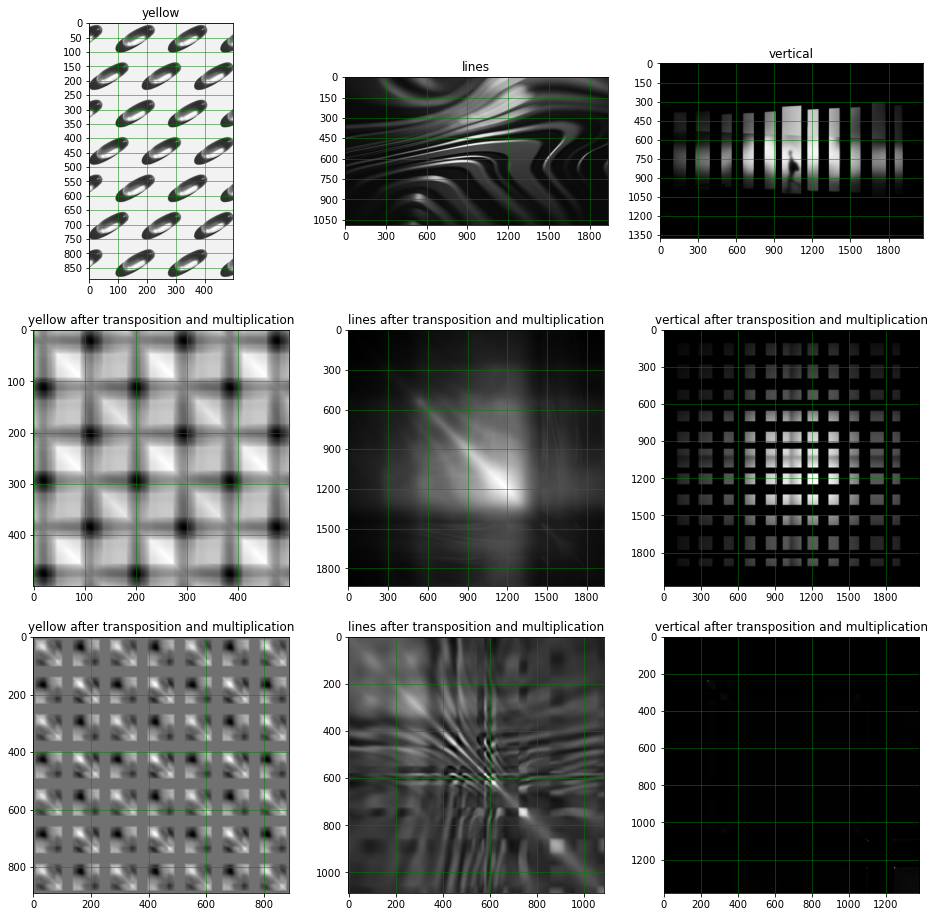

In [8]:
yellow = io.imread('https://images.unsplash.com/photo-1623066542605-bc25b4b662dd?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3'
                   '&ixid=M3wxMjA3fDB8MHx0b3BpYy1mZWVkfDI4fGlVSXNuVnRqQjBZfHxlbnwwfHx8fHw%3D')
lines = io.imread('https://images.unsplash.com/photo-1704520355609-c62b0c4010df?q=80&w=1932&auto=format'
                  '&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')
vertical = io.imread('https://images.unsplash.com/photo-1499428665502-503f6c608263?q=80&w=2070&auto=format&fit=crop&ixlib'
                         '=rb-4.0.3,&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')


fig, axes = plt.subplots(3, 3, figsize=(16, 16))

axes[0,0].imshow(monochrome(yellow), cmap='gray')
axes[0,0].set_title('yellow')
# Включение сетки
axes[0,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,0].set_xticks(range(0, yellow.shape[1], 100))  # Настройка делений сетки по оси X
axes[0,0].set_yticks(range(0, yellow.shape[0], 50))  # Настройка делений сетки по оси Y


axes[0,1].imshow(monochrome(lines), cmap='gray')
axes[0,1].set_title('lines')
# Включение сетки
axes[0,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,1].set_xticks(range(0, lines.shape[1], 300))  # Настройка делений сетки по оси X
axes[0,1].set_yticks(range(0, lines.shape[0], 150))  # Настройка делений сетки по оси Y

axes[0,2].imshow(monochrome(vertical), cmap='gray')
axes[0,2].set_title('vertical')
# Включение сетки
axes[0,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,2].set_xticks(range(0, vertical.shape[1], 300))  # Настройка делений сетки по оси X
axes[0,2].set_yticks(range(0, vertical.shape[0], 150))  # Настройка делений сетки по оси Y


axes[1,0].imshow(trans_mult(yellow), cmap='gray')
axes[1,0].set_title('yellow after transposition and multiplication')
# Включение сетки
axes[1,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1,0].set_xticks(range(0, yellow.shape[1], 100))  # Настройка делений сетки по оси X
axes[1,0].set_yticks(range(0, yellow.shape[1], 100))  # Настройка делений сетки по оси Y


axes[1,1].imshow(trans_mult(lines), cmap='gray')
axes[1,1].set_title('lines after transposition and multiplication')
# Включение сетки
axes[1,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1,1].set_xticks(range(0, lines.shape[1], 300))  # Настройка делений сетки по оси X
axes[1,1].set_yticks(range(0, lines.shape[1], 300))  # Настройка делений сетки по оси Y

axes[1,2].imshow(trans_mult(vertical), cmap='gray')
axes[1,2].set_title('vertical after transposition and multiplication')
# Включение сетки
axes[1,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1,2].set_xticks(range(0, vertical.shape[1], 300))  # Настройка делений сетки по оси X
axes[1,2].set_yticks(range(0, vertical.shape[1], 300))  # Настройка делений сетки по оси Y

axes[2,0].imshow(trans_mult_norm(yellow), cmap='gray')
axes[2,0].set_title('yellow after transposition and multiplication')
# Включение сетки
axes[2,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[2,0].set_xticks(range(0, yellow.shape[0], 200))  # Настройка делений сетки по оси X
axes[2,0].set_yticks(range(0, yellow.shape[0], 200))  # Настройка делений сетки по оси Y


axes[2,1].imshow(trans_mult_norm(lines), cmap='gray')
axes[2,1].set_title('lines after transposition and multiplication')
# Включение сетки
axes[2,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[2,1].set_xticks(range(0, lines.shape[0], 200))  # Настройка делений сетки по оси X
axes[2,1].set_yticks(range(0, lines.shape[0], 200))  # Настройка делений сетки по оси Y

axes[2,2].imshow(trans_mult_norm(vertical), cmap='gray')
axes[2,2].set_title('vertical after transposition and multiplication')
# Включение сетки
axes[2,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[2,2].set_xticks(range(0, vertical.shape[0], 200))  # Настройка делений сетки по оси X
axes[2,2].set_yticks(range(0, vertical.shape[0], 200))  # Настройка делений сетки по оси Y


# Отображение фигуры с подграфиками
plt.show()


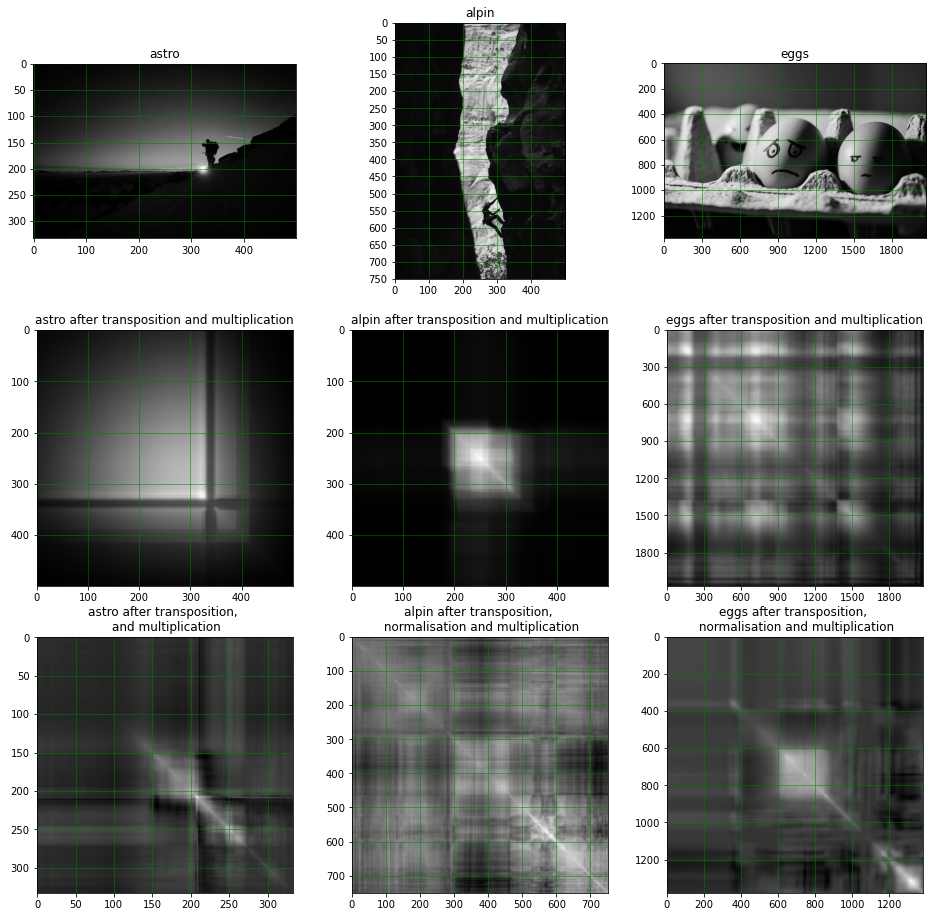

In [9]:
astro = io.imread('https://images.unsplash.com/photo-1707162798192-b32a573ca3a8?w=500&auto=format&fit=crop&q=60&ixlib='
                  'rb-4.0.3&ixid=M3wxMjA3fDB8MHxlZGl0b3JpYWwtZmVlZHwxMHx8fGVufDB8fHx8fA%3D%3D')

alpin = io.imread('https://images.unsplash.com/photo-1683009427041-d810728a7cb6?w=500&auto=format&fit=crop&q='
                 '60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDF8MHxlZGl0b3JpYWwtZmVlZHw2fHx8ZW58MHx8fHx8')
eggs = io.imread('https://images.unsplash.com/photo-1617440168937-c6497eaa8db5?q=80&w=2070&auto'
                '=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')


fig, axes = plt.subplots(3, 3, figsize=(16, 16))

axes[0,0].imshow(monochrome(astro), cmap='gray')
axes[0,0].set_title('astro')
# Включение сетки
axes[0,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,0].set_xticks(range(0, astro.shape[1], 100))  # Настройка делений сетки по оси X
axes[0,0].set_yticks(range(0, astro.shape[0], 50))  # Настройка делений сетки по оси Y


axes[0,1].imshow(monochrome(alpin), cmap='gray')
axes[0,1].set_title('alpin')
# Включение сетки
axes[0,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,1].set_xticks(range(0, alpin.shape[1], 100))  # Настройка делений сетки по оси X
axes[0,1].set_yticks(range(0, alpin.shape[0], 50))  # Настройка делений сетки по оси Y

axes[0,2].imshow(monochrome(eggs), cmap='gray')
axes[0,2].set_title('eggs')
# Включение сетки
axes[0,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,2].set_xticks(range(0, eggs.shape[1], 300))  # Настройка делений сетки по оси X
axes[0,2].set_yticks(range(0, eggs.shape[0], 200))  # Настройка делений сетки по оси Y



axes[1,0].imshow(trans_mult(astro), cmap='gray')
axes[1,0].set_title('astro after transposition and multiplication')
# Включение сетки
axes[1,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1,0].set_xticks(range(0, astro.shape[1], 100))  # Настройка делений сетки по оси X
axes[1,0].set_yticks(range(0, astro.shape[1], 100))  # Настройка делений сетки по оси Y


axes[1,1].imshow(trans_mult(alpin), cmap='gray')
axes[1,1].set_title('alpin after transposition and multiplication')
# Включение сетки
axes[1,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1,1].set_xticks(range(0, alpin.shape[1], 100))  # Настройка делений сетки по оси X
axes[1,1].set_yticks(range(0, alpin.shape[1], 100))  # Настройка делений сетки по оси Y

axes[1,2].imshow(trans_mult(eggs), cmap='gray')
axes[1,2].set_title('eggs after transposition and multiplication')
# Включение сетки
axes[1,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1,2].set_xticks(range(0, eggs.shape[1], 300))  # Настройка делений сетки по оси X
axes[1,2].set_yticks(range(0, eggs.shape[1], 300))  # Настройка делений сетки по оси Y

axes[2,0].imshow(trans_mult_norm(astro), cmap='gray')
axes[2,0].set_title('astro after transposition, \n and multiplication')
# Включение сетки
axes[2,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[2,0].set_xticks(range(0, astro.shape[0], 50))  # Настройка делений сетки по оси X
axes[2,0].set_yticks(range(0, astro.shape[0], 50))  # Настройка делений сетки по оси Y


axes[2,1].imshow(trans_mult_norm(alpin), cmap='gray')
axes[2,1].set_title('alpin after transposition, \n normalisation and multiplication')
# Включение сетки
axes[2,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[2,1].set_xticks(range(0, alpin.shape[0], 100))  # Настройка делений сетки по оси X
axes[2,1].set_yticks(range(0, alpin.shape[0], 100))  # Настройка делений сетки по оси Y

axes[2,2].imshow(trans_mult_norm(eggs), cmap='gray')
axes[2,2].set_title('eggs after transposition, \n normalisation and multiplication')
# Включение сетки
axes[2,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[2,2].set_xticks(range(0, eggs.shape[0], 200))  # Настройка делений сетки по оси X
axes[2,2].set_yticks(range(0, eggs.shape[0], 200))  # Настройка делений сетки по оси Y


# Отображение фигуры с подграфиками
plt.show()


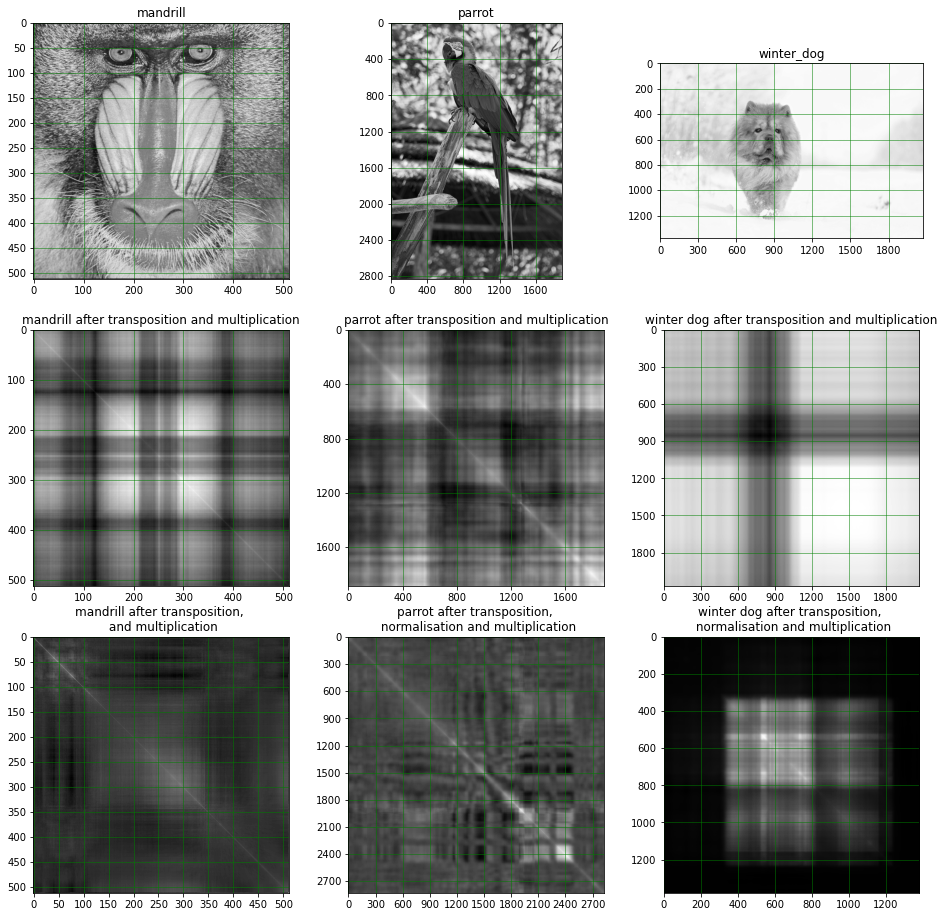

In [10]:
mandrill = io.imread("https://raw.githubusercontent.com/JuliaImages/TestImages.jl/images/images/mandrill.tiff")

parrot = io.imread('https://images.unsplash.com/photo-1534567059665-cbcfe2e73b91?q=80&w=1887&auto=format&fit=crop&ixlib='
                   'rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')

winter_dog = io.imread('https://images.unsplash.com/photo-1678357437275-a4016d7faafd?q=80&w=2070&auto=format&fit=crop&ixlib'
                       '=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')

fig, axes = plt.subplots(3, 3, figsize=(16, 16))

axes[0,0].imshow(monochrome(mandrill), cmap='gray')
axes[0,0].set_title('mandrill')
# Включение сетки
axes[0,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,0].set_xticks(range(0, mandrill.shape[1], 100))  # Настройка делений сетки по оси X
axes[0,0].set_yticks(range(0, mandrill.shape[0], 50))  # Настройка делений сетки по оси Y


axes[0,1].imshow(monochrome(parrot), cmap='gray')
axes[0,1].set_title('parrot')
# Включение сетки
axes[0,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,1].set_xticks(range(0, parrot.shape[1], 400))  # Настройка делений сетки по оси X
axes[0,1].set_yticks(range(0, parrot.shape[0], 400))  # Настройка делений сетки по оси Y

axes[0,2].imshow(monochrome(winter_dog), cmap='gray')
axes[0,2].set_title('winter_dog')
# Включение сетки
axes[0,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,2].set_xticks(range(0, winter_dog.shape[1], 300))  # Настройка делений сетки по оси X
axes[0,2].set_yticks(range(0, winter_dog.shape[0], 200))  # Настройка делений сетки по оси Y



axes[1,0].imshow(trans_mult(mandrill), cmap='gray')
axes[1,0].set_title('mandrill after transposition and multiplication')
# Включение сетки
axes[1,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1,0].set_xticks(range(0, mandrill.shape[1], 100))  # Настройка делений сетки по оси X
axes[1,0].set_yticks(range(0, mandrill.shape[1], 100))  # Настройка делений сетки по оси Y


axes[1,1].imshow(trans_mult(parrot), cmap='gray')
axes[1,1].set_title('parrot after transposition and multiplication')
# Включение сетки
axes[1,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1,1].set_xticks(range(0, parrot.shape[1], 400))  # Настройка делений сетки по оси X
axes[1,1].set_yticks(range(0, parrot.shape[1], 400))  # Настройка делений сетки по оси Y

axes[1,2].imshow(trans_mult(winter_dog), cmap='gray')
axes[1,2].set_title('winter dog after transposition and multiplication')
# Включение сетки
axes[1,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1,2].set_xticks(range(0, winter_dog.shape[1], 300))  # Настройка делений сетки по оси X
axes[1,2].set_yticks(range(0, winter_dog.shape[1], 300))  # Настройка делений сетки по оси Y

axes[2,0].imshow(trans_mult_norm(mandrill), cmap='gray')
axes[2,0].set_title('mandrill after transposition, \n and multiplication')
# Включение сетки
axes[2,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[2,0].set_xticks(range(0, mandrill.shape[0], 50))  # Настройка делений сетки по оси X
axes[2,0].set_yticks(range(0, mandrill.shape[0], 50))  # Настройка делений сетки по оси Y


axes[2,1].imshow(trans_mult_norm(parrot), cmap='gray')
axes[2,1].set_title('parrot after transposition, \n normalisation and multiplication')
# Включение сетки
axes[2,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[2,1].set_xticks(range(0, parrot.shape[0], 300))  # Настройка делений сетки по оси X
axes[2,1].set_yticks(range(0, parrot.shape[0], 300))  # Настройка делений сетки по оси Y

axes[2,2].imshow(trans_mult_norm(winter_dog), cmap='gray')
axes[2,2].set_title('winter dog after transposition, \n normalisation and multiplication')
# Включение сетки
axes[2,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[2,2].set_xticks(range(0, winter_dog.shape[0], 200))  # Настройка делений сетки по оси X
axes[2,2].set_yticks(range(0, winter_dog.shape[0], 200))  # Настройка делений сетки по оси Y


# Отображение фигуры с подграфиками
plt.show()


# Попробуем другой вариант нормализации, где пиксели принимают диапазон от - 1 до 1.
как вот здесь для Julia (https://github.com/anhinga/JuliaCon2021-poster/tree/main/signed-normalization) 

In [14]:
def normalize_image_signed(img):
    img1 = img - np.min(img)
    img2 = (2 / np.max(img1)) * img1
    return img2 - 1


def trans_mult_signed(A):
    result = normalize_image_signed(np.dot(np.transpose(monochrome(A)), monochrome(A)))
    return result

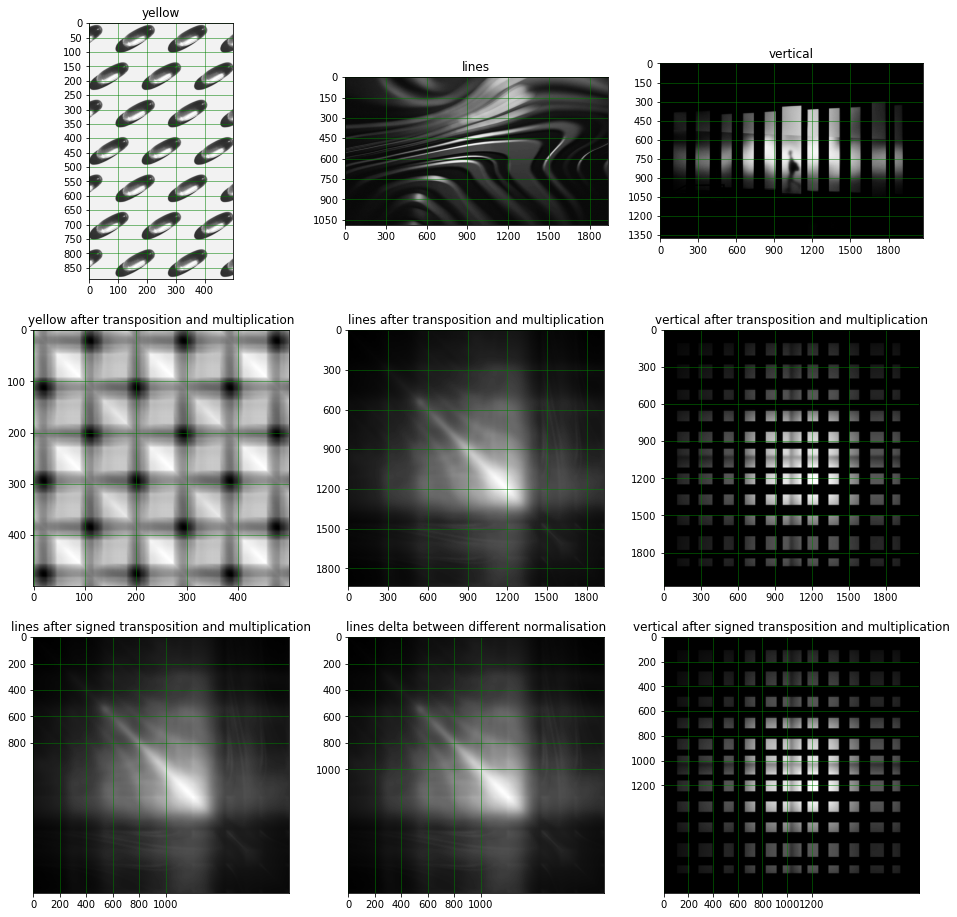

In [25]:
yellow = io.imread('https://images.unsplash.com/photo-1623066542605-bc25b4b662dd?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3'
                   '&ixid=M3wxMjA3fDB8MHx0b3BpYy1mZWVkfDI4fGlVSXNuVnRqQjBZfHxlbnwwfHx8fHw%3D')
lines = io.imread('https://images.unsplash.com/photo-1704520355609-c62b0c4010df?q=80&w=1932&auto=format'
                  '&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')
vertical = io.imread('https://images.unsplash.com/photo-1499428665502-503f6c608263?q=80&w=2070&auto=format&fit=crop&ixlib'
                         '=rb-4.0.3,&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D')


fig, axes = plt.subplots(3, 3, figsize=(16, 16))

axes[0,0].imshow(monochrome(yellow), cmap='gray')
axes[0,0].set_title('yellow')
# Включение сетки
axes[0,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,0].set_xticks(range(0, yellow.shape[1], 100))  # Настройка делений сетки по оси X
axes[0,0].set_yticks(range(0, yellow.shape[0], 50))  # Настройка делений сетки по оси Y


axes[0,1].imshow(monochrome(lines), cmap='gray')
axes[0,1].set_title('lines')
# Включение сетки
axes[0,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,1].set_xticks(range(0, lines.shape[1], 300))  # Настройка делений сетки по оси X
axes[0,1].set_yticks(range(0, lines.shape[0], 150))  # Настройка делений сетки по оси Y

axes[0,2].imshow(monochrome(vertical), cmap='gray')
axes[0,2].set_title('vertical')
# Включение сетки
axes[0,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[0,2].set_xticks(range(0, vertical.shape[1], 300))  # Настройка делений сетки по оси X
axes[0,2].set_yticks(range(0, vertical.shape[0], 150))  # Настройка делений сетки по оси Y


axes[1,0].imshow(trans_mult(yellow), cmap='gray')
axes[1,0].set_title('yellow after transposition and multiplication')
# Включение сетки
axes[1,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1,0].set_xticks(range(0, yellow.shape[1], 100))  # Настройка делений сетки по оси X
axes[1,0].set_yticks(range(0, yellow.shape[1], 100))  # Настройка делений сетки по оси Y


axes[1,1].imshow(trans_mult(lines), cmap='gray')
axes[1,1].set_title('lines after transposition and multiplication')
# Включение сетки
axes[1,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1,1].set_xticks(range(0, lines.shape[1], 300))  # Настройка делений сетки по оси X
axes[1,1].set_yticks(range(0, lines.shape[1], 300))  # Настройка делений сетки по оси Y

axes[1,2].imshow(trans_mult(vertical), cmap='gray')
axes[1,2].set_title('vertical after transposition and multiplication')
# Включение сетки
axes[1,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[1,2].set_xticks(range(0, vertical.shape[1], 300))  # Настройка делений сетки по оси X
axes[1,2].set_yticks(range(0, vertical.shape[1], 300))  # Настройка делений сетки по оси Y

axes[2,0].imshow(trans_mult_signed(lines), cmap='gray')
axes[2,0].set_title('lines after signed transposition and multiplication')
# Включение сетки
axes[2,0].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[2,0].set_xticks(range(0, lines.shape[0], 200))  # Настройка делений сетки по оси X
axes[2,0].set_yticks(range(0, yellow.shape[0], 200))  # Настройка делений сетки по оси Y


axes[2,1].imshow(trans_mult_signed(lines) - trans_mult(lines), cmap='gray')
axes[2,1].set_title('lines delta between different normalisation')
# Включение сетки
axes[2,1].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[2,1].set_xticks(range(0, lines.shape[0], 200))  # Настройка делений сетки по оси X
axes[2,1].set_yticks(range(0, lines.shape[0], 200))  # Настройка делений сетки по оси Y

axes[2,2].imshow(trans_mult_signed(vertical), cmap='gray')
axes[2,2].set_title('vertical after signed transposition and multiplication')
# Включение сетки
axes[2,2].grid(True, which='both', color='green', linestyle='-', linewidth=0.5)
axes[2,2].set_xticks(range(0, vertical.shape[0], 200))  # Настройка делений сетки по оси X
axes[2,2].set_yticks(range(0, vertical.shape[0], 200))  # Настройка делений сетки по оси Y


# Отображение фигуры с подграфиками
plt.show()


**Вывод: нормализация в диапазоне от -1 к 1 дает тот же результат для изображения, как и нормализация от 0 до 1**